# 1 Problem Area

The area of industry that I have chosen to apply natural language processing (NLP) text classification, in particular, sentiment anaylsis, is the financial sector. The challenge of sentiment analysis of financial market news lies at the intersection of NLP and financial analysis. It addresses the need to extract actionable insights from the vast amount of textual data generated daily in financial markets. Solving this problem is crucial for retail and institutional investors and traders who rely on timely and accurate information regarding the market's sentiment, in order to make informed decisions on their investments and trades.

One of the primary difficulties in this domain is the complexity and ambiguity of financial language. Stock market news articles for example, often contain nuanced sentiments, speculative language, and domain and region specific terminology that can be challenging for sentiment analysis models. For instance, words like "bullish" and "bearish", carry different meanings depending on context.

To tackle this challenge, researchers and practitioners have developed various text classification methods that leverage machine learning and NLP techniques. One of the key approaches is sentiment analysis, which aims to classify text into positive, negative, or neutral sentiments based on the underlying emotions expressed.

Prior work in this area has laid the foundation for sentiment analysis in financial texts. Researchers have explored different features and algorithms to improve sentiment classification accuracy. For example, sentiment lexicons specific to financial terms have been developed to enhance the understanding of sentiment-bearing words in financial contexts[1].

On top of that, recent advancements in deep learning, particularly with techniques like recurrent neural networks (RNNs) and transformer models, have shown promise in improving sentiment analysis accuracy by capturing dependencies in text[2].

In summary, the problem of sentiment analysis in financial market news presents a critical area where text classification methods can significantly contribute to the decisions investors and traders make. By building upon prior work in sentiment analysis and leveraging NLP techniques, I hope that my work can add to the importance of NLP in this sector.

# Change object 2, to comparing VADER, Rule-Based Approach to supervised ML, which is better? Lexicon or Supervised?

# 2 Objectives

The objectives of building an NLP Text Classifier for analyzing financial market news sentiment are as follows:

  - <b><u>Objective 1:</u></b> Sentiment Classification Accuracy: To develop an accurate sentiment analysis model specifically tailored for financial market news. This involves training a classifier that can effectively identify and categorize sentiment expressions in financial texts, including nuanced sentiments related to market trends, investor sentiment, and economic indicators.
  
    <u>Justification</u>: Accurate sentiment classification is essential for investors and traders to make informed decisions, especially in the volatile markets we are experiencing now. A reliable sentiment analysis model can help identify market sentiment shifts, assess investor sentiment towards specific stocks or sectors, and gauge the overall market mood.
    <br>

 - <b><u>Objective 2:</u></b> Apply NLP techniques that are a staple in the field: The project aims to leverage established NLP techniques that have demonstrated stability and reliability in sentiment analysis tasks. This includes techniques such as tokenization, feature extraction, and machine learning algorithms like Naive Bayes.
 
     <u>Justification</u>: Utilizing stable NLP techniques ensures robustness and consistency in the sentiment analysis model's performance. These techniques have been studied and validated in various NLP applications and literature reviews, including sentiment analysis, making them well-suited for handling the nuances of stock market news sentiment. 

    
The impact and significance of this project within the problem area of stock market news sentiment analysis are as follows:
- Improved Decision-Making: An accurate sentiment analysis model can significantly improve decision-making processes for investors and traders by providing actionable insights and overall market trends.


As a retail investor myself, that engages in the US market, I would like to use the text classifier that will be built in this project for my own personal use. The decision comes from a desire to maintain independence and avoid potential biases that may arise from relying on institutional or mainstream financial tools. In the world of finance and stock market analysis, there is a constant concern about the influence of large financial institutions on market sentiments and the narratives presented by media publications. A common saying that retail investors constantly churn out is that, "the market is rigged". 

Thus, by developing and relying on my own unbiased text classifier, I aim to mitigate the risk of being swayed by institutional agendas or media bias. This approach allows me to analyze financial and stock market news without the filter of institutional interests, ensuring that my decisions are based on objective analysis rather than potential external influences.

# 3 Dataset

The chosen dataset for this project comes from Kaggle[1]. The dataset comprises financial news headlines from the perspective of a retail investor, and is stored in a CSV file format, with a relatively small size of 657 kilobytes.

The dataset contains two columns:

- <b>Sentiment</b>: This column categorizes the sentiment of each news headline into three distinct types: positive, neutral, and negative. These sentiment labels serve as the known sentiment of the article headline.
<br>
<br>
- <b>News Headline</b>: This column contains the actual headlines of the news articles. It is textual data.

Both columns in the dataset are of string data type, which is common for text-based datasets in NLP tasks.

The labeled nature of this dataset makes it suitable for supervised machine learning approaches, which aligns with the project's objective of building a sentiment analysis classifier model. Supervised learning relies on having labeled data, where the features (in this case, the news headlines) are associated with corresponding labels (sentiments).

On overview of the dataset informs me that it may contain ambiguity, noise, special characters, or irregularities typical of real-world textual data. These aspects will need to be addressed through data preprocessing steps as part of the NLP pipeline. These preprocessing steps, which will be done in the later sections of this project, are crucial for preparing the dataset for feature extraction and building an effective sentiment analysis model.

# 4 Evaluation Methodology

To evaluate the classifier, the follow metrics will be used:

- <b>Accuracy Score</b>: It is how often a model is correct, overall.
- <b>Precision Score</b>: It is how often a model is correct at predicting the target class.
- <b>Confusion Matrix</b> A N*N matrix to evaluate a classfication model, where N is the number of labels.
    
We utilize the accuracy score to measure how well our classifier is at analyzing a given set of article headlines. The higher the score, the better. This means that the classifier is correctly predicting whether an article is positive, neutral or negative, and can be relied upon and trusted when asked to measure new unseen data.

We utilize the precision score to measure how well our classifier is at analyzing each of the given target classes. This will allows us to detect if our classifier is weaker at classifying positive headlines over negative headlines, for example, at investigate further as to the cause for it. The higher the precision score, the better. This will imply the classifier is good at predicting each of the 3 classes, respectively.

The confusion matrix will provide a general overview of the performance of the classifier for each of the 3 target classes, and is a common practise in the field of machine learning classification models.

# 5 Preprocessing 

## 5.1 Data Cleaning & Transformation

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
from nltk import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud

In [2]:
#import csv and load into pandas dataframe
df = pd.read_csv("all-data.csv",encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [4]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


The file appears to not have the actual column headings mentioned in '3 Dataset'. Lets address that first.

In [5]:
#extract the false formated column values
firstEntry = list(df.columns)

In [6]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#rename columns
df = df.rename(columns={'neutral':'sentiment',
                        'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Headline'})

#append a new single row
addRow = {'sentiment':firstEntry[0],'Headline':firstEntry[1]}
df = df._append(addRow,ignore_index=True)

In [7]:
#column value is now in the last row
df.tail()

,sentiment,Headline
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...
4845,neutral,"According to Gran , the company has no plans t..."


In [8]:
df.describe()

,sentiment,Headline
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


Originally the file contained 4845 rows, but because we know that the first row was formatted as column headers, we renamed the columns, and added the back the extracted old header vaues. Thus, the row count increased by row, which is correct.

In [9]:
df.isnull().sum()

sentiment    0
Headline     0
dtype: int64

No missing values in our dataframe.

In the later sections of the project, a text classifier model will be built. To accomadate the model, I will tranform the labels into 3 numerical classes, whilst retainng the textual data of the headline to be processing by the model.

The 3 numerical classes will be:

<b>1</b>: positive sentiment

<b>0</b>: neutral sentiment

<b>-1</b>: negative sentiment

In [10]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#replace the sentiment values based on condition
df['sentiment'] = df['sentiment'].apply(lambda val: {'positive': 1, 'neutral':0 ,'negative': -1}.get(val, ' '))

In [11]:
df.head()

,sentiment,Headline
0,0,Technopolis plans to develop in stages an area...
1,-1,The international electronic industry company ...
2,1,With the new production plant the company woul...
3,1,According to the company 's updated strategy f...
4,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## 5.2 Text Normalization

Converting all text to ASCII and lowercase helps standardize the text and ensures that the model doesn't treat "the" and "The" as different tokens. This step is vital in tasks where the case of the text doesn't carry significant meaning, such as sentiment analysis.

Punctuation marks like commas, periods, exclamation marks, etc., typically do not contribute directly to sentiment analysis and can add noise to the data. Removing them can help the model focus on meaningful words and improve accuracy.

We also remove digits as they do not add value to analyzing sentiment as well.

So the first step in the normalization process is addressing these two agendas. Regular Expression and built in Python string methods will be used.

In [12]:
#MY ORIGINAL CODE/CONTRIBUTIONS

def ascii_lower(str_):
    #this regex removes characters that come after an apostrophe,eg apple's -> apple
    reg = re.sub(r"'[a-z]+",'',str_)
    x = reg.encode("ascii", "ignore").decode()
    x = x.lower()
    return x

def removeDigits(str_):
    #replace all special characters, that is, everything that isnt a letter or digit
    reg = re.sub(r'[^A-Za-z ]+','',str_)
    return reg

#apply our function to the headline column
df['Headline'] = df['Headline'].apply(ascii_lower)
df['Headline'] = df['Headline'].apply(removeDigits)

In [13]:
df.tail()

,sentiment,Headline
4841,0,rinkuskiai beer sales fell by per cent to m...
4842,-1,operating profit fell to eur mn from eur mn ...
4843,-1,net sales of the paper segment decreased to eu...
4844,-1,sales in finland decreased by in january wh...
4845,0,according to gran the company has no plans to...


The next step is our normalization process is to tokenize the headlines and remove common stopwords that add no value to the sentiment analysis. 

We also lemmatize our tokens to break them down into a more meaningful base form. This is known also as linguistically principled anaylsis. We choose this over stemming as stemming simply removes the last few characters to return a root word, and because the stock market news headlines can contain nuances statement that stemming cannot provide any value to.

For example, stemming "historical highs" would return "histori highs". Whereas lemmatization would return "historical highs". The word "historical" is of much more value than "histori", which is not a English word at all.

In [14]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#we store our tokenized words from our headlines into a list, for visualization later
tokenizedData= []

#define lemmatization object
lt = WordNetLemmatizer()

#create our stopwords set
myStopWords = set(stopwords.words('english'))

def custom_tokenizer(headline):
    tokens = []
    for sent in sent_tokenize(headline):
        for word in word_tokenize(sent):
            if word not in myStopWords:
                tokenizedData.append(word)
                word = lt.lemmatize(word)
                tokens.append(word)
            
    newHeadline = ' '.join(tokens)
    return newHeadline

df['Updated_Headlines'] = df['Headline'].apply(custom_tokenizer)

In [15]:
df.head()

,sentiment,Headline,Updated_Headlines
0,0,technopolis plans to develop in stages an area...,technopolis plan develop stage area le square ...
1,-1,the international electronic industry company ...,international electronic industry company elco...
2,1,with the new production plant the company woul...,new production plant company would increase ca...
3,1,according to the company updated strategy for...,according company updated strategy year baswar...
4,1,financing of aspocomp s growth aspocomp is agg...,financing aspocomp growth aspocomp aggressivel...


We now have our updated headlines, where the textual data is in lowercase ascii, containing no digits and special characters, common stopwords removed and remaining words lemmatized. I will go ahead and drop the old headline column,

In [16]:
df = df.drop('Headline',axis=1)
df = df.rename(columns={'Updated_Headlines':'Headlines'})

## 5.3 Visualizing the data

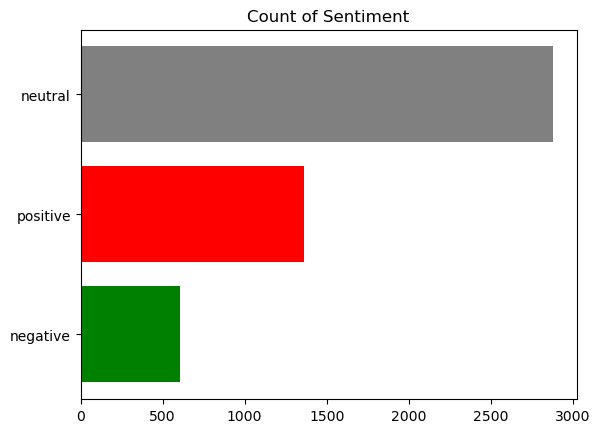

In [17]:
#MY ORIGINAL CODE/CONTRIBUTIONS

#plotting a bar chart with matplotlib
fig, ax = plt.subplots()

yAxisVal = ['neutral','positive','negative']
xAxisVal = df.sentiment.value_counts()
barColors = ['grey','red','green']

ax.barh(yAxisVal, xAxisVal, align='center',color=barColors)
ax.invert_yaxis()
ax.set_title('Count of Sentiment')

plt.show()

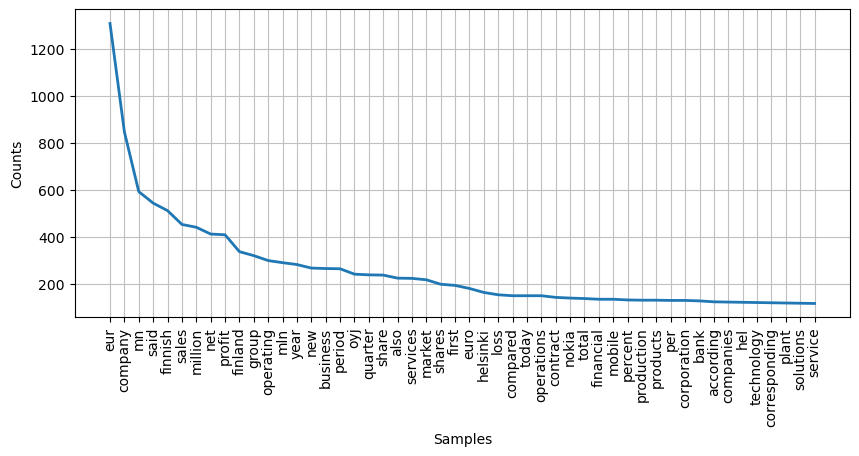

<Axes: xlabel='Samples', ylabel='Counts'>

In [18]:
#frequncy diagram of the most common tokens in our dataset
FreqData = FreqDist(w for w in tokenizedData)
plt.figure(figsize=(10,4))
FreqData.plot(50)

Based on the frequency distribution plot, it appears that a significant portion of the financial headlines originates from Europe, specifically focusing on the European market, and Finland seems to be at the core of these news articles.

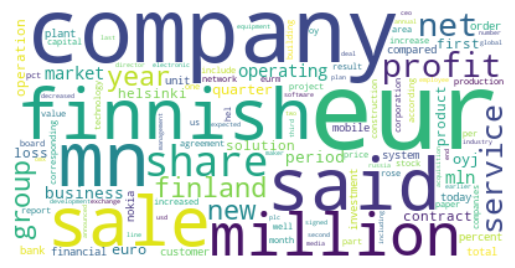

In [19]:
#MY ORIGINAL CODE/CONTRIBUTIONS
word_Cloud_Text = " ".join(tokenizedData)

#plotting a word using the WordCloud library
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(word_Cloud_Text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above word cloud provides a more visual and readable representation of the frequency distribution diagram.

## 5.4 Text Representation

For this project, I have chosen the Bag of Words Model to represent the textual data at hand. The reason for this choice are as follows:

- Simplicity and Efficiency: The BoW model is relatively simple to implement and understand. It represents text data as a collection of words without considering the order or structure of the sentences. This simplicity makes it computationally efficient and scalable
<br>

- Suitability for Classification: The BoW model is well-suited for classification tasks, where the goal is to assign labels to input text data, this case, the financial news headlines and its respective sentiment. It works effectively with classifiers like Naive Bayes, Support Vector Machines (SVM), and Random Forests, making it a versatile choice for sentiment analysis.

counterVectorizer built from scratch
https://medium.com/@saivenkat_/implementing-countvectorizer-from-scratch-in-python-exclusive-d6d8063ace22

In [20]:
#import's sklearn's CounteVectorizer to build the BoW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#convert the headlines column values into a list
headline_list = df['Headlines'].tolist()

count_Vect = CountVectorizer(max_features=200)
X = count_Vect.fit_transform(headline_list)
X = X.toarray()

In [21]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

# 6 Baseline performance

https://www.mecs-press.org/ijisa/ijisa-v9-n7/IJISA-V9-N7-3.pdf

' The results of our proposed model achieved
higher accuracy for sentiment analysis in determining the
news polarities by using Naïve Bayes algorithm up to
86.21%'

ANOTHER BASELINE, which i think is better, using nltk.SentimentIntensityAnalyzer() (LEXICONS)

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#initializer object
analyzer = SentimentIntensityAnalyzer()

#function to get sentiment score
def get_sentiment_score(headline):
    return analyzer.polarity_scores(headline)['compound']

#apply sentiment analysis to each headline and create a new column 'Sentiment'
df['Sentiment_Analyzer'] = df['Headlines'].apply(get_sentiment_score)

In [23]:
df.tail()

,sentiment,Headlines,Sentiment_Analyzer
4841,0,rinkuskiai beer sale fell per cent million lit...,0.0000
4842,-1,operating profit fell eur mn eur mn including ...,0.7430
4843,-1,net sale paper segment decreased eur mn second...,0.4404
4844,-1,sale finland decreased january sale outside fi...,0.0000
4845,0,according gran company plan move production ru...,0.1779


# 7 Classification Approach

# 8 Evaluation

# 9 Conclusion

# 10 References

[1] S. Sohangir, N. Petty and D. Wang, "Financial Sentiment Lexicon Analysis," 2018 IEEE 12th International Conference on Semantic Computing (ICSC), Laguna Hills, CA, USA, 2018, pp. 286-289, doi: 10.1109/ICSC.2018.00052.

[2] Devlin, J., Chang, M., Lee, K., & Toutanova, K. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. North American Chapter of the Association for Computational Linguistics.

[3] https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news/data

# book mark links

https://www.kaggle.com/code/shritech1404/bag-of-word-for-stock-market-sentiment-dataset

https://www.kaggle.com/code/darkcore/basic-nlp-classify

https://www.kaggle.com/code/sihabhossan/stock-market-sentiment-analysis

https://www.kaggle.com/code/jayitabhattacharyya/sentiment-analysis-daily-financial-news-for-6000

https://freedium.cfd/https://towardsdatascience.com/fundamentals-of-supervised-sentiment-analysis-1975b5b54108

https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news/data

